This notebook looks for signs of tactical voting during the 2015 Wikimedia Foundation Board election.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas
import numpy as np

In [18]:
# Each line of the raw ballot file looks like,
#     -1, 0, 1, 1, 1, 1, -1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0
# A line corresponds to a user's ballot, and each column is a vote for candidates in the order below:

order = [
    "Houcemeddine Turki – User:Csisc",
    "Sailesh Patnaik – User:Saileshpat",
    "Dariusz Jemielniak – User:Pundit",
    "Mohamed Ouda – User:Mohamed Ouda",
    "Josh Lim – User:Sky Harbor",
    "David Conway – User:Smerus",
    "Francis Kaswahili Kaguna – User:Francis Kaswahili",
    "Cristian Consonni – User:CristianCantoro",
    "Peter Gallert – User:Pgallert",
    "María Sefidari – User:Raystorm",
    "Phoebe Ayers – User:Phoebe",
    "Denny Vrandečić – User:Denny",
    "Ali Haidar Khan (Tonmoy) – User:Ali Haidar Khan",
    "Nisar Ahmed Syed – User:అహ్మద్ నిసార్",
    "James Heilman – User:Doc James",
    "Tim Davenport – User:Carrite",
    "Samuel Klein – User:Sj",
    "Syed Muzammiluddin – User:Hindustanilanguage",
    "Edward Saperia – User:EdSaperia",
    "Mike Nicolaije – User:Taketa",
    "Pete Forsyth - User:Peteforsyth (candidate has withdrawn)",
]

ballots = pandas.read_csv("../data/2015 ballots.txt", header=None, names=order)

## Distribution of tactics per ballot

In [3]:
# Count occurences of each vote direction, for each ballot.
voter_tactics = pandas.DataFrame(columns=[1,0,-1], dtype=np.int8)
# Count occurences of each type of vote, for each candidate.
for rownum, ballot in ballots.iterrows():
    counts = ballot.value_counts()
    voter_tactics = voter_tactics.append(counts)

# Zero out NaNs
voter_tactics = voter_tactics.fillna(value=0)

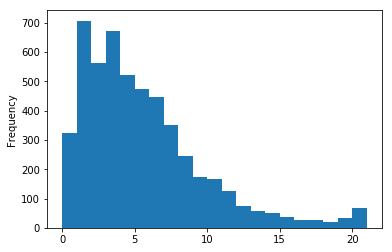

In [4]:
# Distribution of support votes per ballot.
voter_tactics[1].plot(kind='hist', bins=21);

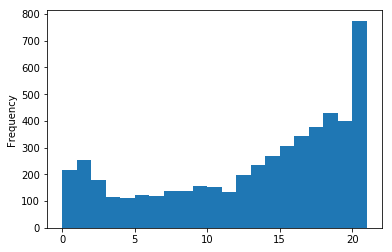

In [5]:
# Distribution of neutral votes per ballot.
voter_tactics[0].plot(kind='hist', bins=21);

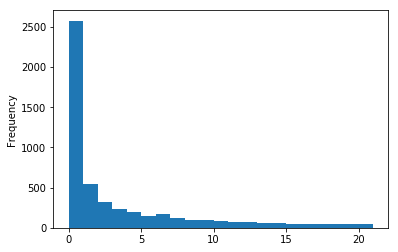

In [6]:
# Distribution of oppose votes per ballot.
voter_tactics[-1].plot(kind='hist', bins=21);

## Impact on each candidate

We can find each voter's relative contribution to the election outcome,

"Support percentage" totals before and after a single vote.
\begin{align}
T_{n - 1} & = \frac{S}{S + O} \\
T_n & = \frac{S + s_n}{(S + s_n) + (O + o_n)} \\
\end{align}

Solving for the vote's impact $I$,

\begin{align}
I & = T_n - T_{n-1} \\
  & = \frac{S + s_n}{(S + s_n) + (O + o_n)} - \frac{S}{S + O} \\
  & = \frac{S^2 + Ss_n + S{O} + {s_n}O - S^2 - S{s_n} - S{O} - S{o_n}}{S^2 + S{s_n} + S{O} + S{o_n} + S{O} + s_n{O} + O^2 + O{o_n}} \\
  & = \frac{{s_n}O - S{o_n}}{S^2 + S{s_n} + 2S{O} + S{o_n} + s_n{O} + O^2 + O{o_n}} \\
\end{align}

In [19]:
final_tallies = pandas.read_csv("../data/2015 board election.csv", index_col=0)

vote_impacts_per_candidate_map = final_tallies
vote_impacts_per_candidate_map = vote_impacts_per_candidate_map.assign(
    support_impact = lambda x: x.Oppose / ((x.Support - 1) * x.Support + x.Oppose * (x.Oppose + 1) + 2 * (x.Support - 1) * x.Oppose))
vote_impacts_per_candidate_map = vote_impacts_per_candidate_map.assign(
    oppose_impact = lambda x: -x.Support / (x.Support * (x.Support + 1) + (x.Oppose - 1) * x.Oppose + 2 * x.Support * (x.Oppose - 1)))

vote_impacts_per_candidate_map

,Support,Neutral,Oppose,support_impact,oppose_impact
Candidate,,,,,
Dariusz Jemielniak – User:Pundit,2028,2583,556,0.000083,-0.000304
James Heilman – User:Doc James,1857,2732,578,0.000098,-0.000313
Denny Vrandečić – User:Denny,1628,2995,544,0.000115,-0.000345
María Sefidari – User:Raystorm,2184,2208,775,0.000089,-0.000250
Phoebe Ayers – User:Phoebe,1955,2498,714,0.000100,-0.000275
Mike Nicolaije – User:Taketa,1524,3076,567,0.000130,-0.000349
Peter Gallert – User:Pgallert,1467,3046,654,0.000145,-0.000326
Cristian Consonni – User:CristianCantoro,1381,3150,636,0.000156,-0.000340
Tim Davenport – User:Carrite,1571,2871,725,0.000138,-0.000298


This graph shows the relative weight of a support or oppose vote for each candidate.

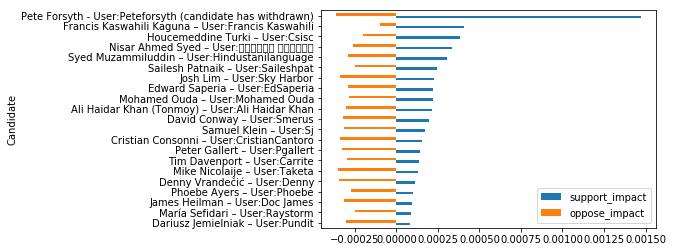

In [20]:
vote_impacts_per_candidate_map.filter(items=['support_impact', 'oppose_impact']).sort_values(by='support_impact').plot(kind='barh')

In [39]:
# Make the map more convenient to use.

vote_impacts_per_candidate_map[-1] = vote_impacts_per_candidate_map['oppose_impact']
vote_impacts_per_candidate_map[1] = vote_impacts_per_candidate_map['support_impact']
vote_impacts_per_candidate_map[0] = 0

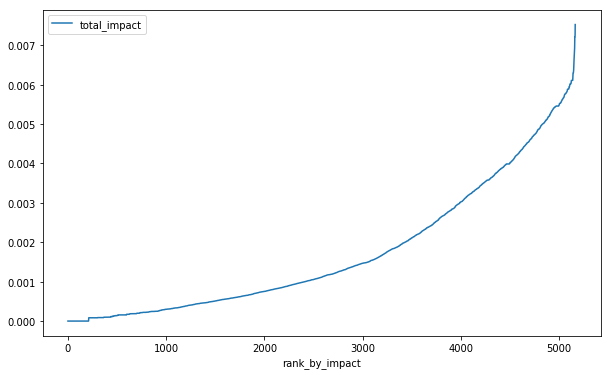

In [68]:
# Map the ballots to impact per candidate.
impact_ballots = ballots.copy()

for candidate in vote_impacts_per_candidate_map.index:
    impact_ballots[candidate] \
        = impact_ballots[candidate].map(
            vote_impacts_per_candidate_map.loc[candidate, :]
    )

impact_ballots = impact_ballots.assign(total_impact = lambda x: x[order].abs().sum(axis=1))
impact_ballots = impact_ballots.sort_values(by='total_impact')
impact_ballots['rank_by_impact'] = range(len(impact_ballots))
impact_ballots.plot.line(x='rank_by_impact', y='total_impact', figsize=(10,6))

In [11]:
# TODO:
# - Heuristic for determining likelihood of tactical voting.
# - Which candidates got tactical and non-tactical votes?
# - Outcome if everyone had voted tactically